In [1]:
import pandas as pd
df = pd.read_csv('data/compas-scores-raw.csv')

In [2]:
df.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Person_ID,60843.0,53683.206154,14363.648515,656.00,52039.00,57321.00,62748.0,68608.0
AssessmentID,60843.0,68061.029190,7320.208226,649.00,62582.00,68229.00,73870.0,79678.0
Case_ID,60843.0,60209.128149,9638.501654,350.00,56021.00,61261.00,66554.0,72045.0
ScaleSet_ID,60843.0,21.819536,0.932614,17.00,22.00,22.00,22.0,22.0
RecSupervisionLevel,60843.0,1.630048,0.944220,1.00,1.00,1.00,2.0,4.0
Scale_ID,60843.0,11.000000,4.966596,7.00,7.00,8.00,18.0,18.0
RawScore,60843.0,5.081457,10.080518,-4.79,-2.09,-0.71,14.0,51.0
DecileScore,60843.0,3.571701,2.617854,-1.00,1.00,3.00,5.0,10.0
IsCompleted,60843.0,1.000000,0.000000,1.00,1.00,1.00,1.0,1.0
IsDeleted,60843.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                60843 non-null  int64  
 1   AssessmentID             60843 non-null  int64  
 2   Case_ID                  60843 non-null  int64  
 3   Agency_Text              60843 non-null  object 
 4   LastName                 60843 non-null  object 
 5   FirstName                60843 non-null  object 
 6   MiddleName               15648 non-null  object 
 7   Sex_Code_Text            60843 non-null  object 
 8   Ethnic_Code_Text         60843 non-null  object 
 9   DateOfBirth              60843 non-null  object 
 10  ScaleSet_ID              60843 non-null  int64  
 11  ScaleSet                 60843 non-null  object 
 12  AssessmentReason         60843 non-null  object 
 13  Language                 60843 non-null  object 
 14  LegalStatus           

# Making sense of the variables #

**Person_ID** - Identification associated with defendants <br>
**AssessmentID** - Identification associated with assessment <br>
**Case_ID** - Identification associated with case <br>
**Agency_Text** - Where the people were assessed by COMPAS <br>
**LastName, FirstName, MiddleName** - Name information of defendants <br>
**Sex_Code_Text** - Defendant gender information (Male/Female) <br>
**Ethnic_Code_Text** - Defendant racial information (9 ethnicities) <br>
**DateOfBirth** - Defendant age information (Can be utilized with Screening_Date to obtain age) <br>
**ScaleSet_ID** - Based on ScaleSet (17 = All Scales, 22 = Risk and Prescreen) <br>
**ScaleSet** - Scale applied for assessment (All Scales/Risk and Prescreen)<br>
**AssessmentReason** - All values are "intake"<br>
**Language** - Assumed to be language utilized by defendant (English/Spanish) <br>
**LegalStatus** - Defendant's legal status (Parole violator, Pretrial, etc)<br>
**CustodyStatus** - Defendant's custodial status (Parole, Probation, etc)<br>
**MaritalStatus** - Defendant's marital status (Married/Single)<br>
**Screening_Date** - Date where defendant was assessed and score given<br>
**RecSupervisionLevel** - Recomended Supervision Level scored from 1 to 4<br>
**RecSupervisionLevelText** - 1 = Low, 2 = Medium, 3 = Medium with Override Consideration, 4 = High<br>
**Scale_ID** - Identification associated with scale used (7/8/18)<br>
**DisplayText** - Risk of Violence/Risk of Recidivism/Risk of failure to appear <br>Every Person_ID is repeated thrice to account for these 3<br>
**RawScore** - Risk score associated with display text<br>
**DecileScore** - Score associated with defendant (in a scale of 1 to 10 and "NA")<br>
**ScoreText** - Category based on DecileScore<br>
Below 5 is "Low", 5-7 is "Medium", 8-10 is "High", -1 is given "NA" (empty)<br>
**AssessmentType** - New or Copy, whether previously generated or new<br> 
**IsCompleted** -All default to 1<br>
**IsDeleted** - All default to 0<br>

In [5]:
print("Total rows: ",len(df))
n = df.nunique(axis=0)
print("No.of.unique values in each column :\n",
      n)

Total rows:  60843
No.of.unique values in each column :
 Person_ID                  18610
AssessmentID               20281
Case_ID                    19530
Agency_Text                    4
LastName                   10896
FirstName                   7225
MiddleName                  1871
Sex_Code_Text                  2
Ethnic_Code_Text               9
DateOfBirth                10382
ScaleSet_ID                    2
ScaleSet                       2
AssessmentReason               1
Language                       2
LegalStatus                    7
CustodyStatus                  6
MaritalStatus                  7
Screening_Date               705
RecSupervisionLevel            4
RecSupervisionLevelText        4
Scale_ID                       3
DisplayText                    3
RawScore                     659
DecileScore                   11
ScoreText                      3
AssessmentType                 2
IsCompleted                    1
IsDeleted                      1
dtype: int64


In [6]:
print("For Agency_Text variable")
print(df["Agency_Text"].unique())
print(df["Agency_Text"].value_counts())

print("\nFor ScaleSet variable")
print(df["ScaleSet"].unique())
print(df["ScaleSet"].value_counts())

print("\nFor ScaleSet_ID variable")
print(df["ScaleSet_ID"].unique())
print(df["ScaleSet_ID"].value_counts())

print("\nFor LegalStatus variable")
print(df["LegalStatus"].unique())
print(df["LegalStatus"].value_counts())

print("\nFor CustodyStatus variable")
print(df["CustodyStatus"].unique())
print(df["CustodyStatus"].value_counts())

print("\nFor RecSupervisionLevel variable")
print(df["RecSupervisionLevel"].unique())
print(df["RecSupervisionLevel"].value_counts())

print("\nFor RecSupervisionLevelText variable")
print(df["RecSupervisionLevelText"].unique())
print(df["RecSupervisionLevelText"].value_counts())

print("\nFor Scale_ID variable")
print(df["Scale_ID"].unique())
print(df["Scale_ID"].value_counts())

print("\nFor DecileScore variable")
print(df["DecileScore"].unique())
print(df["DecileScore"].value_counts())

print("\nFor ScoreText variable")
print(df["ScoreText"].unique())
print(df["ScoreText"].value_counts())

For Agency_Text variable
['PRETRIAL' 'Probation' 'DRRD' 'Broward County']
PRETRIAL          41100
Probation         19056
DRRD                564
Broward County      123
Name: Agency_Text, dtype: int64

For ScaleSet variable
['Risk and Prescreen' 'All Scales']
Risk and Prescreen    58647
All Scales             2196
Name: ScaleSet, dtype: int64

For ScaleSet_ID variable
[22 17]
22    58647
17     2196
Name: ScaleSet_ID, dtype: int64

For LegalStatus variable
['Pretrial' 'Post Sentence' 'Conditional Release' 'Other'
 'Probation Violator' 'Parole Violator' 'Deferred Sentencing']
Pretrial               37578
Post Sentence          18333
Other                   4356
Conditional Release      420
Probation Violator       126
Parole Violator           18
Deferred Sentencing       12
Name: LegalStatus, dtype: int64

For CustodyStatus variable
['Jail Inmate' 'Probation' 'Pretrial Defendant' 'Residential Program'
 'Prison Inmate' 'Parole']
Jail Inmate            30129
Probation              22968

# Accounting for the difference in unique Person_ID and total rows
Total rows:  60843 <br>
No.of.unique values in each column : <br>
Person_ID - 18610 <br>
AssessmentID - 20281 <br>

From this statistics, we can tell that there is a 1:3 mapping for AssessmentID to total rows, mainly due to the 3 risks (Risk of violence, risk of recidivism and risk of failure to appear). However, there are a total of 5013 that are unaccounted for based off Person_ID. [60843 - (18610*3)] We shall investigate this below. 

In [7]:
print(df["Person_ID"].isnull().sum())

0


In [8]:
person_id_counts = df['Person_ID'].value_counts()
print("Less than 3 occurrence: ",len(person_id_counts[person_id_counts < 3].index.tolist()))
print("3 occurrence: ",len(person_id_counts[person_id_counts == 3].index.tolist()))
print("6 occurrence: ",len(person_id_counts[person_id_counts == 6].index.tolist()))
print("9 occurrence: ",len(person_id_counts[person_id_counts == 9].index.tolist()))
print("12 occurrence: ",len(person_id_counts[person_id_counts == 12].index.tolist()))
print("More than 12 occurrence: ",len(person_id_counts[person_id_counts > 12].index.tolist()))

Less than 3 occurrence:  0
3 occurrence:  17077
6 occurrence:  1411
9 occurrence:  106
12 occurrence:  16
More than 12 occurrence:  0


In [9]:
# Filter the DataFrame for entries where Person_ID appears exactly 12 times
entries_with_12_occurrences = df[df['Person_ID'].isin(person_id_counts[person_id_counts == 12].index)]
entries_with_12_occurrences

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
141,50892,57232,52011,PRETRIAL,Yunis,Omar,Nassim,Male,Caucasian,08/29/92,...,4,High,7,Risk of Violence,-0.89,9,High,New,1,0
142,50892,57232,52011,PRETRIAL,Yunis,Omar,Nassim,Male,Caucasian,08/29/92,...,4,High,8,Risk of Recidivism,0.37,9,High,New,1,0
143,50892,57232,52011,PRETRIAL,Yunis,Omar,Nassim,Male,Caucasian,08/29/92,...,4,High,18,Risk of Failure to Appear,19.00,3,Low,New,1,0
1116,46011,57546,46360,PRETRIAL,BONES,ANTHONY,NaN,Male,African-American,08/19/93,...,4,High,7,Risk of Violence,-0.98,9,High,Copy,1,0
1117,46011,57546,46360,PRETRIAL,BONES,ANTHONY,NaN,Male,African-American,08/19/93,...,4,High,8,Risk of Recidivism,0.59,9,High,Copy,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56089,52668,77922,70526,PRETRIAL,LOUIS,COURTNEY,NaN,Male,African-American,05/11/85,...,3,Medium with Override Consideration,8,Risk of Recidivism,0.13,8,High,New,1,0
56090,52668,77922,70526,PRETRIAL,LOUIS,COURTNEY,NaN,Male,African-American,05/11/85,...,3,Medium with Override Consideration,18,Risk of Failure to Appear,30.00,8,High,New,1,0
60051,34467,79386,71801,PRETRIAL,Douze,Mike,NaN,Male,African-American,11/03/89,...,1,Low,7,Risk of Violence,-2.24,3,Low,New,1,0
60052,34467,79386,71801,PRETRIAL,Douze,Mike,NaN,Male,African-American,11/03/89,...,1,Low,8,Risk of Recidivism,-0.32,5,Medium,New,1,0


In [10]:
# Investigate an example "50892"
person_id_50892_rows = df[df['Person_ID'] == 50892]
person_id_50892_rows

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
141,50892,57232,52011,PRETRIAL,Yunis,Omar,Nassim,Male,Caucasian,08/29/92,...,4,High,7,Risk of Violence,-0.89,9,High,New,1,0
142,50892,57232,52011,PRETRIAL,Yunis,Omar,Nassim,Male,Caucasian,08/29/92,...,4,High,8,Risk of Recidivism,0.37,9,High,New,1,0
143,50892,57232,52011,PRETRIAL,Yunis,Omar,Nassim,Male,Caucasian,08/29/92,...,4,High,18,Risk of Failure to Appear,19.00,3,Low,New,1,0
4983,50892,58968,52011,PRETRIAL,Yunis,Omar,Nassim,Male,Caucasian,08/29/92,...,4,High,7,Risk of Violence,-0.89,9,High,Copy,1,0
4984,50892,58968,52011,PRETRIAL,Yunis,Omar,Nassim,Male,Caucasian,08/29/92,...,4,High,8,Risk of Recidivism,0.37,9,High,Copy,1,0
4985,50892,58968,52011,PRETRIAL,Yunis,Omar,Nassim,Male,Caucasian,08/29/92,...,4,High,18,Risk of Failure to Appear,19.00,3,Low,Copy,1,0
5061,50892,58967,52011,PRETRIAL,Yunis,Omar,Nassim,Male,Caucasian,08/29/92,...,4,High,7,Risk of Violence,-0.89,9,High,Copy,1,0
5062,50892,58967,52011,PRETRIAL,Yunis,Omar,Nassim,Male,Caucasian,08/29/92,...,4,High,8,Risk of Recidivism,0.37,9,High,Copy,1,0
5063,50892,58967,52011,PRETRIAL,Yunis,Omar,Nassim,Male,Caucasian,08/29/92,...,4,High,18,Risk of Failure to Appear,19.00,3,Low,Copy,1,0
44373,50892,73499,66606,PRETRIAL,Yunis,Omar,Nassim,Male,Caucasian,08/29/92,...,4,High,7,Risk of Violence,-0.98,9,High,New,1,0


No rows with null Person_ID, however, there are rows with Person_ID that repeat, as much as even 4 times, creating a total of 12 occurrences of appearance. Closely identifying the values in excel sheet reveal that "AssessmentType" being "Copy" is an exact copy with no changes. However, there might be multiple assessment on an individual, in which they will be assigned "New" for "AssessmentType". <br> 
### To deal with this we should drop where "AssessmentType" is "Copy" to remove duplicate entries.

# Breaking down the racial biased dataset #
We shall dive into the ethnicity variable to understand more about the distribution as well as shape of the variable itself <br>
We shall also investigate the ending "DocileScore" and "Raw Score" with relation to "Ethnic_Code_Text"

In [11]:
print("For Ethnic_Code_Text variable")
print(df["Ethnic_Code_Text"].unique())
print(df["Ethnic_Code_Text"].value_counts())

For Ethnic_Code_Text variable
['Caucasian' 'African-American' 'Hispanic' 'Other' 'Asian' 'African-Am'
 'Native American' 'Oriental' 'Arabic']
African-American    27018
Caucasian           21783
Hispanic             8742
Other                2592
Asian                 324
Native American       219
Arabic                 75
African-Am             51
Oriental               39
Name: Ethnic_Code_Text, dtype: int64


In [12]:
# Changing of "African-Am" to "African-American"
df["Ethnic_Code_Text"].replace({"African-Am": "African-American"}, inplace=True)
print("For Ethnic_Code_Text variable")
print(df["Ethnic_Code_Text"].unique())
print(df["Ethnic_Code_Text"].value_counts())

For Ethnic_Code_Text variable
['Caucasian' 'African-American' 'Hispanic' 'Other' 'Asian'
 'Native American' 'Oriental' 'Arabic']
African-American    27069
Caucasian           21783
Hispanic             8742
Other                2592
Asian                 324
Native American       219
Arabic                 75
Oriental               39
Name: Ethnic_Code_Text, dtype: int64


### There is no changes done to Oriental or Asian
Oriental means Eastern. Asian is from Asia. The term Oriental is English in origin because relative to Great Britain, Asia is to the east. <br>
From google: "In contemporary American English, Oriental usually refers to things from the parts of East Asia traditionally occupied by East Asians and most Central Asians and Southeast Asians racially categorized as "Mongoloid". This excludes Jews, Indians, Arabs, and most other South or West Asian peoples."

<AxesSubplot:xlabel='Ethnic_Code_Text'>

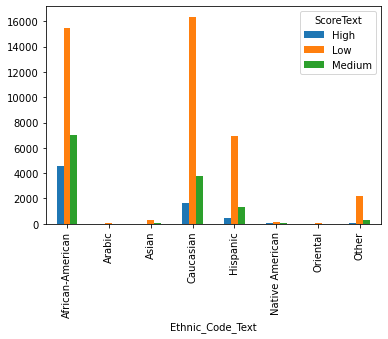

In [13]:
text_by_race = df.groupby(["Ethnic_Code_Text", "ScoreText"], sort=True)["Person_ID"].size()
text_by_race.unstack().plot.bar(stacked=False)

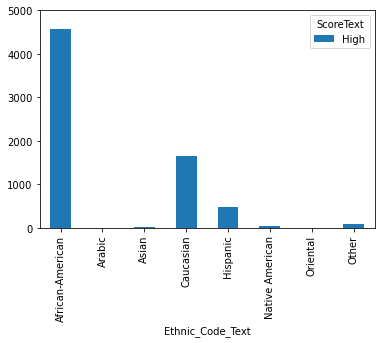

In [14]:
#To explore where "ScoreText" = "High"
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df_high_score = df[df["ScoreText"] == "High"]

# Group by "Ethnic_Code_Text" and "ScoreText" and get the count
text_by_race = df_high_score.groupby(["Ethnic_Code_Text", "ScoreText"], sort=True)["Person_ID"].size()

# Unstack and plot
text_by_race.unstack().plot.bar(stacked=False, ylim=(0,5000))
plt.show()

<AxesSubplot:title={'center':'Mean DecileScore By Race'}, xlabel='Ethnic_Code_Text'>

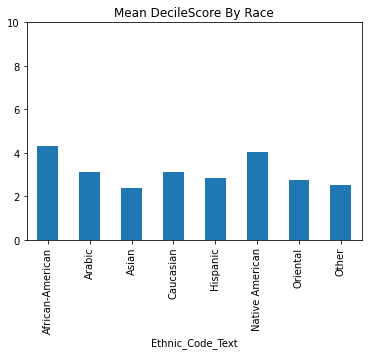

In [15]:
decile_by_race = df.groupby(["Ethnic_Code_Text"], sort=True)["DecileScore"].mean()
decile_by_race.plot(kind='bar', title='Mean DecileScore By Race', ylim=(0,10))

<AxesSubplot:title={'center':'Mean RawScore By Race'}, xlabel='Ethnic_Code_Text'>

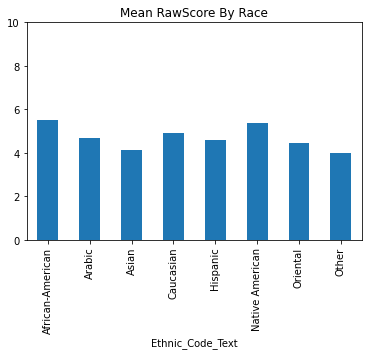

In [16]:
rscore_by_race = df.groupby(["Ethnic_Code_Text"], sort=True)["RawScore"].mean()
rscore_by_race.plot(kind='bar', title='Mean RawScore By Race', ylim=(0,10))

### Some observations
1. RawScore has a high correlation with DecileScore
2. There is a lot more African-American labelled as "High" for ScoreText despite Mean DecileScore being similar across all ethnicity <br>
    -This suggests that there could be a lot of "Low" for ScoreText within the other ethnicity, therefore bringing the average score down <br>
    -This could also suggest that the distribution or spread of DecileScore is a lot wider for African-American compared to Caucasian where the scores are tighter 

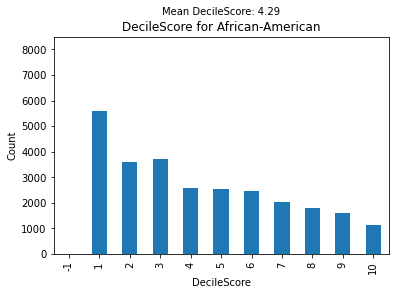

In [17]:
df_afamerican = df[df['Ethnic_Code_Text'] == 'African-American']

# Calculate mean DecileScore
mean_decile_score = df_afamerican['DecileScore'].mean()

# Plot a bar graph for DecileScore
ax = df_afamerican['DecileScore'].value_counts().sort_index().plot(kind='bar', ylim=(0,8500))

# Print the mean DecileScore above the bar graph
ax.text(0.5, 1.1, f'Mean DecileScore: {mean_decile_score:.2f}', transform=ax.transAxes, ha='center')

plt.title('DecileScore for African-American')
plt.xlabel('DecileScore')
plt.ylabel('Count')
plt.show()

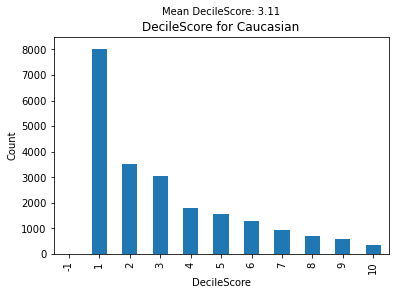

In [18]:
df_caucasian = df[df['Ethnic_Code_Text'] == 'Caucasian']

# Calculate mean DecileScore
mean_decile_score = df_caucasian['DecileScore'].mean()

# Plot a bar graph for DecileScore
ax = df_caucasian['DecileScore'].value_counts().sort_index().plot(kind='bar', ylim=(0,8500))

# Print the mean DecileScore above the bar graph
ax.text(0.5, 1.1, f'Mean DecileScore: {mean_decile_score:.2f}', transform=ax.transAxes, ha='center')

plt.title('DecileScore for Caucasian')
plt.xlabel('DecileScore')
plt.ylabel('Count')
plt.show()

As seen from the above 2 plots, there is a significant difference between the DecileScore distribution for the 2 largest sample of the dataset, "African-American" and "Caucasian". On average, the probability of an "African-American" labelled with a higher DecileScore is higher.

# Find rows where predictors are very similar but response different
To do this, we would first have to consider removing identification variables and bin numerical variables to lower the range <br>
This includes the following
1. Person_ID
2. AssessmentID
3. Case_ID
4. LastName
5. FirstName
6. MiddleName
7. ScaleSet_ID
8. AssessmentReason
9. Screening_Date
10. RecSupervisionLevelText
11. Scale_ID
12. AssessmentType
13. IsCompleted
14. IsDeleted

Following can be transformed
1. DOB transformed to show exact age --> datediff(DateOfBirth - Screening_Date) <br>

In [19]:
# Found an entry where DoB was 2018, this entry will be removed.
person_id_filter = df['Person_ID'] == 54272
result_df = df[person_id_filter]
print(result_df)
df = df[df['Person_ID'] != 54272]

       Person_ID  AssessmentID  Case_ID Agency_Text   LastName FirstName  \
12000      54272         61547    55871    PRETRIAL  Lightfoot     Corey   
12001      54272         61547    55871    PRETRIAL  Lightfoot     Corey   
12002      54272         61547    55871    PRETRIAL  Lightfoot     Corey   

      MiddleName Sex_Code_Text  Ethnic_Code_Text DateOfBirth  ...  \
12000        NaN          Male  African-American    11/04/18  ...   
12001        NaN          Male  African-American    11/04/18  ...   
12002        NaN          Male  African-American    11/04/18  ...   

       RecSupervisionLevel RecSupervisionLevelText Scale_ID  \
12000                    1                     Low        7   
12001                    1                     Low        8   
12002                    1                     Low       18   

                     DisplayText RawScore DecileScore ScoreText  \
12000           Risk of Violence    -3.53           1       Low   
12001         Risk of Recidivis

In [20]:
# DateOfBirth has values like 10/1/1977, 08/31/80, 08/14/90, 1/3/1986
# to standardise, we shall extract the last 2 characters and park them in a new column "BirthYear"
df['BirthYear'] = df['DateOfBirth'].str[-2:]

# Convert BirthYear to numeric
df['BirthYear'] = pd.to_numeric(df['BirthYear'], errors='coerce')

# Add '19' to the values in 'BirthYear'
df['BirthYear'] = df['BirthYear'].apply(lambda x: x + 1900)


# Display the updated DataFrame
print(df[['DateOfBirth', 'BirthYear']])

# To check, we should investigate the earliest and latest birthYear.
min_birth_year = df['BirthYear'].min()
max_birth_year = df['BirthYear'].max()

print("Lowest Birth Year:", min_birth_year)
print("Highest Birth Year:", max_birth_year)

      DateOfBirth  BirthYear
0        12/05/92       1992
1        12/05/92       1992
2        12/05/92       1992
3        09/16/84       1984
4        09/16/84       1984
...           ...        ...
60838    06/21/64       1964
60839    06/21/64       1964
60840    02/06/85       1985
60841    02/06/85       1985
60842    02/06/85       1985

[60840 rows x 2 columns]
Lowest Birth Year: 1919
Highest Birth Year: 1998


In [21]:
# Screening_Date has values like 3/31/14 0:00 and 10/3/2013 0:00
# to standardise, we shall extract the last 2 characters and park them in a new column "ScreeningYear"

# Convert 'Screening_Date' to datetime
df['Screening_Date'] = pd.to_datetime(df['Screening_Date'], errors='coerce')

# Extract the year and ensure it is in four-digit format
df['ScreeningYear'] = df['Screening_Date'].dt.year.apply(lambda x: x if x >= 1000 else x + 2000)


In [22]:
print("\nFor BirthYear variable")
print(df["BirthYear"].unique())
print(df["BirthYear"].value_counts())

print("\nFor ScreeningYear variable")
print(df["ScreeningYear"].unique())
print(df["ScreeningYear"].value_counts())


For BirthYear variable
[1992 1984 1994 1985 1966 1993 1972 1986 1980 1978 1988 1979 1970 1991
 1975 1973 1981 1989 1960 1967 1955 1974 1987 1943 1977 1983 1968 1982
 1971 1959 1947 1962 1990 1965 1963 1964 1944 1954 1953 1956 1933 1961
 1969 1996 1976 1950 1958 1942 1957 1951 1929 1995 1946 1948 1945 1940
 1949 1952 1938 1937 1941 1935 1932 1936 1997 1939 1925 1930 1919 1998]
1989    2676
1990    2652
1988    2550
1991    2532
1993    2412
        ... 
1933       3
1925       3
1930       3
1919       3
1929       3
Name: BirthYear, Length: 70, dtype: int64

For ScreeningYear variable
[2013 2014]
2013    31812
2014    29028
Name: ScreeningYear, dtype: int64


In [23]:
earliest_sdate = df['ScreeningYear'].min()
print("Earliest ScreeningYear :", earliest_sdate)
earliest_date = df['BirthYear'].min()
latest_date = df['BirthYear'].max()
print("Earliest BirthYear:", earliest_date)
print("Latest BirthYear:", latest_date)

Earliest ScreeningYear : 2013
Earliest BirthYear: 1919
Latest BirthYear: 1998


In [24]:
from datetime import datetime

# Calculate age and create a new column "Age"
df['Age'] = df['ScreeningYear'] - df['BirthYear']
df['Age']

0        21
1        21
2        21
3        29
4        29
         ..
60838    50
60839    50
60840    29
60841    29
60842    29
Name: Age, Length: 60840, dtype: int64

In [25]:
youngest = df['Age'].min()
print("Youngest :", youngest)
oldest = df['Age'].max()
print("Oldest:", oldest)

Youngest : 16
Oldest: 95


### We can further bin the age groups for easier identifcation.
With references to https://www.statcan.gc.ca/en/concepts/definitions/previous/age1a <br>
The age groups will be as such:
1. Youths and Adults (15-24)
2. Adults (24-64)
3. Seniors (65 and older)

In [26]:
# Define age bins and labels
bins = [15, 24, 64, 100]
labels = ['1', '2', '3']

# Create the "AgeGroup" column
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [27]:
print("\nFor AgeGroup variable")
print(df["AgeGroup"].unique())
print(df["AgeGroup"].value_counts())


For AgeGroup variable
['1', '2', '3']
Categories (3, object): ['1' < '2' < '3']
2    46737
1    13026
3     1077
Name: AgeGroup, dtype: int64


In [28]:
df.describe()

,Person_ID,AssessmentID,Case_ID,ScaleSet_ID,RecSupervisionLevel,Scale_ID,RawScore,DecileScore,IsCompleted,IsDeleted,BirthYear,ScreeningYear,Age
count,60840.000000,60840.000000,60840.000000,60840.000000,60840.000000,60840.000000,60840.000000,60840.000000,60840.0,60840.0,60840.000000,60840.00000,60840.000000
mean,53683.177120,68061.350394,60209.342061,21.819527,1.630079,11.000000,5.081421,3.571746,1.0,0.0,1979.325148,2013.47712,34.151972
std,14364.002055,7320.245783,9638.691149,0.932636,0.944233,4.966596,10.080443,2.617884,0.0,0.0,12.165524,0.49948,12.167282
min,656.000000,649.000000,350.000000,17.000000,1.000000,7.000000,-4.790000,-1.000000,1.0,0.0,1919.000000,2013.00000,16.000000
25%,52038.750000,62582.750000,56021.750000,22.000000,1.000000,7.000000,-2.090000,1.000000,1.0,0.0,1971.000000,2013.00000,24.000000
50%,57321.500000,68229.500000,61261.500000,22.000000,1.000000,8.000000,-0.710000,3.000000,1.0,0.0,1982.000000,2013.00000,31.000000
75%,62748.250000,73870.250000,66554.250000,22.000000,2.000000,18.000000,14.000000,5.000000,1.0,0.0,1989.000000,2014.00000,43.000000
max,68608.000000,79678.000000,72045.000000,22.000000,4.000000,18.000000,51.000000,10.000000,1.0,0.0,1998.000000,2014.00000,95.000000


# For analysing similar entries but with different results
Here, we drop duplicated entries first followed by columns with drastically wide values

In [29]:
df = df[df['AssessmentType'] != 'Copy']

In [30]:
columns_to_drop = ['Person_ID','AssessmentID','Case_ID','LastName','FirstName','MiddleName','DateOfBirth','ScaleSet_ID','AssessmentReason','Screening_Date','RecSupervisionLevelText','Scale_ID','AssessmentType','IsCompleted','IsDeleted','BirthYear','ScreeningYear','Age']
df_dropped = df.drop(columns=columns_to_drop)
df_dropped

,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,DisplayText,RawScore,DecileScore,ScoreText,AgeGroup
0,PRETRIAL,Male,Caucasian,Risk and Prescreen,English,Pretrial,Jail Inmate,Single,1,Risk of Violence,-2.08,4,Low,1
1,PRETRIAL,Male,Caucasian,Risk and Prescreen,English,Pretrial,Jail Inmate,Single,1,Risk of Recidivism,-1.06,2,Low,1
2,PRETRIAL,Male,Caucasian,Risk and Prescreen,English,Pretrial,Jail Inmate,Single,1,Risk of Failure to Appear,15.00,1,Low,1
3,PRETRIAL,Male,Caucasian,Risk and Prescreen,English,Pretrial,Jail Inmate,Married,1,Risk of Violence,-2.84,2,Low,2
4,PRETRIAL,Male,Caucasian,Risk and Prescreen,English,Pretrial,Jail Inmate,Married,1,Risk of Recidivism,-1.50,1,Low,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,Probation,Male,African-American,Risk and Prescreen,English,Pretrial,Jail Inmate,Single,3,Risk of Recidivism,0.16,8,High,2
60839,Probation,Male,African-American,Risk and Prescreen,English,Pretrial,Jail Inmate,Single,3,Risk of Failure to Appear,35.00,10,High,2
60840,PRETRIAL,Male,Caucasian,Risk and Prescreen,English,Pretrial,Jail Inmate,Single,1,Risk of Violence,-2.75,2,Low,2
60841,PRETRIAL,Male,Caucasian,Risk and Prescreen,English,Pretrial,Jail Inmate,Single,1,Risk of Recidivism,-0.34,5,Medium,2


In [31]:
condition = df_dropped['DisplayText'].isin(['Risk of Recidivism'])
df_rec = df_dropped[condition].copy()
df_rec

,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,DisplayText,RawScore,DecileScore,ScoreText,AgeGroup
1,PRETRIAL,Male,Caucasian,Risk and Prescreen,English,Pretrial,Jail Inmate,Single,1,Risk of Recidivism,-1.06,2,Low,1
4,PRETRIAL,Male,Caucasian,Risk and Prescreen,English,Pretrial,Jail Inmate,Married,1,Risk of Recidivism,-1.50,1,Low,2
7,PRETRIAL,Male,African-American,Risk and Prescreen,English,Pretrial,Jail Inmate,Single,4,Risk of Recidivism,0.18,8,High,1
10,PRETRIAL,Female,African-American,Risk and Prescreen,English,Pretrial,Jail Inmate,Significant Other,2,Risk of Recidivism,-0.53,6,Medium,1
13,PRETRIAL,Female,African-American,Risk and Prescreen,English,Pretrial,Jail Inmate,Single,1,Risk of Recidivism,-1.55,2,Low,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60829,PRETRIAL,Male,Hispanic,Risk and Prescreen,English,Pretrial,Jail Inmate,Single,2,Risk of Recidivism,-0.42,5,Medium,2
60832,PRETRIAL,Male,Caucasian,Risk and Prescreen,English,Post Sentence,Probation,Single,1,Risk of Recidivism,-0.36,5,Medium,2
60835,PRETRIAL,Male,Caucasian,Risk and Prescreen,English,Pretrial,Jail Inmate,Single,1,Risk of Recidivism,-1.57,1,Low,2
60838,Probation,Male,African-American,Risk and Prescreen,English,Pretrial,Jail Inmate,Single,3,Risk of Recidivism,0.16,8,High,2


In [32]:
df_sorted = df_rec.sort_values(by=['Sex_Code_Text', 'Agency_Text', 'LegalStatus', 'CustodyStatus', 'MaritalStatus','RecSupervisionLevel','AgeGroup','ScaleSet', 'Language'])
df_sorted

,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,DisplayText,RawScore,DecileScore,ScoreText,AgeGroup
45019,Broward County,Female,Caucasian,Risk and Prescreen,English,Post Sentence,Jail Inmate,Single,1,Risk of Recidivism,-1.94,1,Low,2
42349,Broward County,Female,Caucasian,Risk and Prescreen,English,Pretrial,Jail Inmate,Divorced,1,Risk of Recidivism,-1.28,3,Low,2
59023,Broward County,Female,African-American,Risk and Prescreen,English,Pretrial,Jail Inmate,Single,2,Risk of Recidivism,-0.14,7,Medium,2
9220,Broward County,Female,African-American,Risk and Prescreen,English,Pretrial,Pretrial Defendant,Single,1,Risk of Recidivism,-0.87,4,Low,1
7714,Broward County,Female,Hispanic,Risk and Prescreen,English,Pretrial,Pretrial Defendant,Single,1,Risk of Recidivism,-1.28,3,Low,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14896,Probation,Male,Caucasian,Risk and Prescreen,English,Probation Violator,Probation,Married,1,Risk of Recidivism,-0.98,3,Low,2
8347,Probation,Male,Caucasian,All Scales,English,Probation Violator,Probation,Single,1,Risk of Recidivism,-0.97,2,Low,2
10852,Probation,Male,Hispanic,All Scales,English,Probation Violator,Probation,Single,1,Risk of Recidivism,-1.12,2,Low,2
24766,Probation,Male,African-American,All Scales,English,Probation Violator,Probation,Single,1,Risk of Recidivism,-0.49,4,Low,2


In [33]:
# Transform RawScore such that 0 for negative and 1 for positive
df_sorted['RawScore'] = df_sorted['RawScore'].apply(lambda x: 1 if x > 0 else 0)


In [34]:
# Find only similar entries
similar = df_sorted[df_sorted.duplicated(["RawScore","Agency_Text", "Sex_Code_Text", "Ethnic_Code_Text", "ScaleSet", "Language", "LegalStatus", "CustodyStatus", "MaritalStatus", "RecSupervisionLevel", "AgeGroup"], keep=False)]

# Display the duplicates
similar

,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,ScaleSet,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,DisplayText,RawScore,DecileScore,ScoreText,AgeGroup
9397,DRRD,Female,African-American,All Scales,English,Post Sentence,Probation,Single,2,Risk of Recidivism,0,7,Medium,1
9415,DRRD,Female,African-American,All Scales,English,Post Sentence,Probation,Single,2,Risk of Recidivism,0,6,Medium,1
28696,DRRD,Female,African-American,All Scales,English,Post Sentence,Probation,Single,2,Risk of Recidivism,0,5,Medium,1
30100,DRRD,Female,African-American,All Scales,English,Post Sentence,Probation,Single,2,Risk of Recidivism,0,6,Medium,1
52564,DRRD,Female,African-American,All Scales,English,Post Sentence,Probation,Single,2,Risk of Recidivism,0,7,Medium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48295,Probation,Male,African-American,Risk and Prescreen,English,Pretrial,Probation,Married,1,Risk of Recidivism,0,1,Low,2
48205,Probation,Male,Hispanic,Risk and Prescreen,English,Pretrial,Probation,Separated,1,Risk of Recidivism,0,1,Low,2
58549,Probation,Male,Hispanic,Risk and Prescreen,English,Pretrial,Probation,Separated,1,Risk of Recidivism,0,2,Low,2
13345,Probation,Male,Hispanic,Risk and Prescreen,English,Pretrial,Probation,Single,1,Risk of Recidivism,0,2,Low,2


In [35]:
# To explore via excel
similar.to_csv('sorted.csv', index=False)

# All findings summarised

## Variables and their description
**Person_ID** - Identification associated with defendants <br>
**AssessmentID** - Identification associated with assessment <br>
**Case_ID** - Identification associated with case <br>
**Agency_Text** - Where the people were assessed by COMPAS <br>
**LastName, FirstName, MiddleName** - Name information of defendants <br>
**Sex_Code_Text** - Defendant gender information (Male/Female) <br>
**Ethnic_Code_Text** - Defendant racial information (8 ethnicities - African-Am combined with African-American) <br>
**DateOfBirth** - Defendant age information (Can be utilized with Screening_Date to obtain age) <br>
**ScaleSet_ID** - Based on ScaleSet (17 = All Scales, 22 = Risk and Prescreen) <br>
**ScaleSet** - Scale applied for assessment (All Scales/Risk and Prescreen)<br>
**AssessmentReason** - All values are "intake"<br>
**Language** - Assumed to be language utilized by defendant (English/Spanish) <br>
**LegalStatus** - Defendant's legal status (Parole violator, Pretrial, etc)<br>
**CustodyStatus** - Defendant's custodial status (Parole, Probation, etc)<br>
**MaritalStatus** - Defendant's marital status (Married/Single)<br>
**Screening_Date** - Date where defendant was assessed and score given<br>
**RecSupervisionLevel** - Recomended Supervision Level scored from 1 to 4<br>
**RecSupervisionLevelText** - 1 = Low, 2 = Medium, 3 = Medium with Override Consideration, 4 = High<br>
**Scale_ID** - Identification associated with scale used (7/8/18)<br>
**DisplayText** - Risk of Violence/Risk of Recidivism/Risk of failure to appear <br>Every Person_ID is repeated thrice to account for these 3<br>
**RawScore** - Risk score associated with display text<br>
**DecileScore** - Score associated with defendant (in a scale of 1 to 10 and "NA")<br>
**ScoreText** - Category based on DecileScore<br>
Below 5 is "Low", 5-7 is "Medium", 8-10 is "High", -1 is given "NA" (empty)<br>
**AssessmentType** - New or Copy, whether previously generated or new (Copy means it is a duplicated entry, can be dropped)<br> 
**IsCompleted** -All default to 1<br>
**IsDeleted** - All default to 0<br>

## Person_ID mismatch with total entries
No rows with null Person_ID, however, there are rows with Person_ID that repeat, as much as even 4 times, creating a total of 12 occurrences of appearance. Closely identifying the values in excel sheet reveal that "AssessmentType" being "Copy" is an exact copy with no changes. However, there might be multiple assessment on an individual, in which they will be assigned "New" for "AssessmentType".
To deal with this we should drop where "AssessmentType" is "Copy" to remove duplicate entries. <br>

## Ethnicity_Code_Text amendments
### African-Am merged with African-American
Both carry the same meaning but given different label, hence can be combined. There is code written in this notebook to address the merging of these 2 values within the Ethnicity_Code_Text column.
### Oriental and Asian Ethnicity
There is no changes done to Oriental or Asian <br>
Oriental means Eastern. Asian is from Asia. The term Oriental is English in origin because relative to Great Britain, Asia is to the east. <br>
From google: "In contemporary American English, Oriental usually refers to things from the parts of East Asia traditionally occupied by East Asians and most Central Asians and Southeast Asians racially categorized as "Mongoloid". This excludes Jews, Indians, Arabs, and most other South or West Asian peoples." <br>

## Ethnicity_Code_Text distribution 
Majority of the dataset (60843) comprise of African-American (27069) as well as Caucasian (21783), making up about 2/3 of the total dataset. <br>
There are about 4,500 African-American labelled as "High" compared to 1,800 Caucasian. <br>

## DecileScore and RawScore
Mean RawScore and Mean DecileScore for each Ethnicity_Code_Text has a similar distribution shape, meaning that there is high correlation between high RawScore and high DecileScore. <br>
Mean DecileScore for African-American is 4.29 compared to 3.11 for Caucasian.
Distribution wise, the DecileScore for African-American is much more compact with some variation whereas for Caucasian there is a decreasing trend.

## Creation of Age
Originally, the columns "DateOfBirth" and "ScreeningDate" is inconsistent. Therefore, there is code written to address this. Through this, we can properly create an "Age" column to properly visualise the age. We have also binned these age values into "AgeGroup" to better categorise the datapoints.
1. Youths and Adults (15-24) (13,026 entries)
2. Adults (24-64) (46,737 entries)
3. Seniors (65 and older) (1,077 entries)
We have also discovered an invalid entry where "DateOfBirth" has a later date than "ScreeningDate". Therefore, there is code written within this notebook to remove this entry.

## Similar Entries but different outcomes
To better investigate how there might be biasness within the dataset, we are finding entries with similar variables but different outcomes. We have written code and temporarily transformed "RawScore" into 1 for positive and 0 for negative. The findings has been added into the shared google docs. <br>
There are entries where the variables are similar but Ethnicity_Code_Text is Caucasian against African-American. The Caucasian entry has a DecileScore of 1 whereas the African-American has a DecileScore of 5. This shows the disparity or biasness that is present in assigning a DecileScore. 